### Wine Project

Data Import:

In [113]:
import pandas as pd

red_path = './data/winequality-red.csv'
white_path = './data/winequality-white.csv'

red_dataset = pd.read_csv(red_path, header=0, sep=';')
white_dataset = pd.read_csv(white_path, header=0, sep=';')

# Task 1 Exploring the data:

In [114]:
display(red_dataset.describe())
display(red_dataset.head())
display(white_dataset.describe())
display(white_dataset.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## White wine quality distribution:

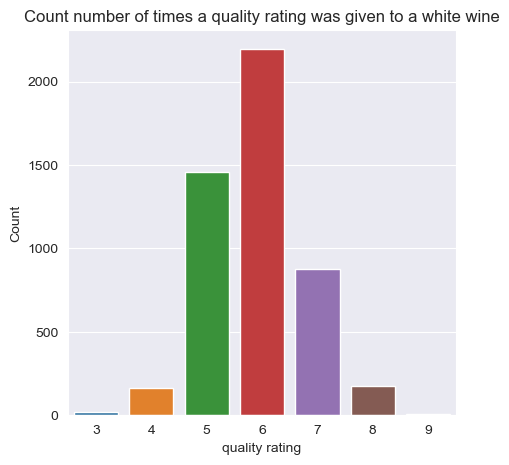

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5,5))
sns.countplot(x = "quality", data = white_dataset)
plt.title("Count number of times a quality rating was given to a white wine")
plt.xlabel("quality rating")
plt.ylabel("Count")
plt.show()
plt.close()


The above plot shows that between 5 and 7 are the most commonly given quality rating among the white wine samples with 6 being by far the most common. A count plot was used as it clearly displays the distribution of quality ratings given in the white wine database.

## Red wine quality distribution:

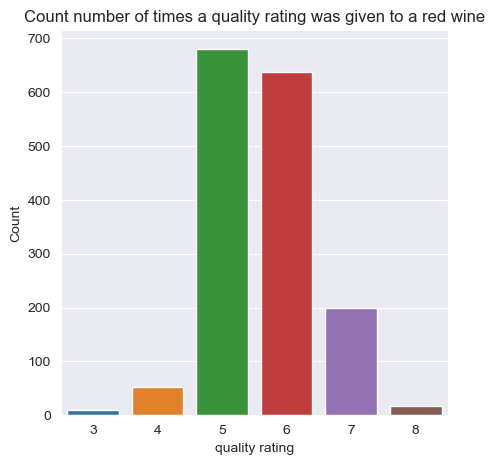

In [116]:
plt.figure(figsize = (5,5))
sns.countplot(x = "quality", data = red_dataset)
plt.title("Count number of times a quality rating was given to a red wine")
plt.xlabel("quality rating")
plt.ylabel("Count")
plt.show()
plt.close()

The above plot shows that 5 and 6 are by far the most commonly given quality ratings for wines in the red wine data set. A count plot was used for the same reason as it was in the white wine example as it gives a clear insight into the distribution of quality ratings given across the samples in the red wine database.

## Comparison of red and white quality distributions:


Text(0.5, 1.0, 'Red Wine')

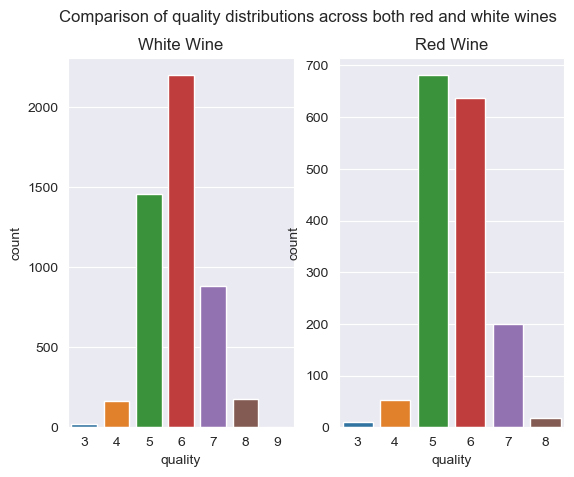

In [117]:
fig, ax =plt.subplots(1,2)
sns.countplot(x="quality",data=white_dataset, ax=ax[0])
sns.countplot(x="quality",data=red_dataset , ax=ax[1])
fig.suptitle("Comparison of quality distributions across both red and white wines")
ax[0].set_title("White Wine")
ax[1].set_title("Red Wine")

The above plots show a comparison between the distribution of quality ratings across the samples of red and white wine. It is clearly shown there are significantly more samples of white wines than red wines. These plots show that both red and white wine share a similar distribution across the quality ratings which were given in each data set this could be because most wines would fall in an average category and only a wine being notably good or notably bad could warrant a rating of less than five or more than 6. It is evident from these graphs that the reviewers are more willing to give a value of 7 than they are to give any value less than 5 this could be due to the reviewers having a generally positive attitude towards wine and so would require more negative motivation to give a bellow average rating, but not enough data on the reviewers is available to test this. The plots also show that on average a higher quality of white wine was sampled compared to red wine this could be due to reviewer preference or due to actually due to lower quality red wines being sampled but again not enough information is available to confirm this.

## Categorizing Wine based on alcohol content white wine:

In [118]:
white_lower = white_dataset["alcohol"].mean() - white_dataset["alcohol"].std()
white_upper = white_dataset["alcohol"].mean() + white_dataset["alcohol"].std()
white_dataset["alcohol_cat"] = pd.cut(
    x=white_dataset["alcohol"],
    bins=[0,white_lower, white_upper, white_dataset["alcohol"].max()],
    labels=["low", "average", "high"]
)
display(white_dataset.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average


In the code above a lower and upper bound of alcohol content in white wine is calculated where the upper is one standard deviation above the mean and the lower is one standard deviation bellow the mean. These variables are used to categorise the white wine samples as high medium or low in alcohol content.

## Categorizing wine based on alcohol content Red Wine:

In [119]:
red_lower = red_dataset["alcohol"].mean() - red_dataset["alcohol"].std()
red_upper = red_dataset["alcohol"].mean() + red_dataset["alcohol"].std()
red_dataset["alcohol_cat"] = pd.cut(
    x=red_dataset["alcohol"],
    bins=[0,red_lower, red_upper, red_dataset["alcohol"].max()],
    labels=["low", "average", "high"]
)
display(red_dataset.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average


The same method as with the red wine samples was used to categorise the alcohol content in the red wine samples but the boundaries were adjusted to the red wine data sample.

## Quality Distribution based on alcohol content for white wines:

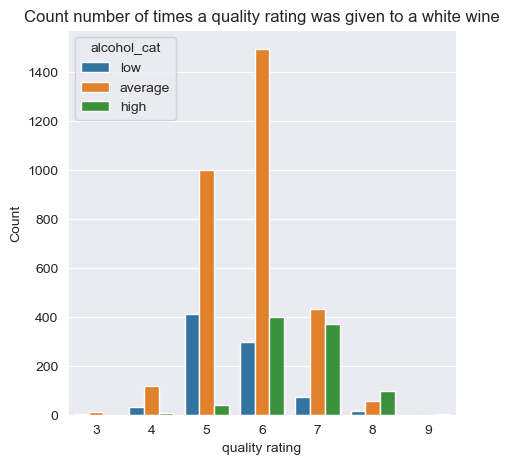

In [120]:
plt.figure(figsize = (5,5))
sns.countplot(x = "quality", data = white_dataset, hue="alcohol_cat")
plt.title("Count number of times a quality rating was given to a white wine")
plt.xlabel("quality rating")
plt.ylabel("Count")
plt.show()
plt.close()

The plot above shows the effect alcohol content has on the distribution of quality ratings given. The plot shows that there are not a huge amount of white wines which are outside the average alcohol content so the alcohol content was quite tightly grouped across the sample and did not vary a huge amount. A count plot was used as it is able to clearly show the effect alcohol content has had on the quality rating distribution with the use of the hue function to separate the categories of alcohol content.

## Quality Distribution based on alcohol content for red wines:

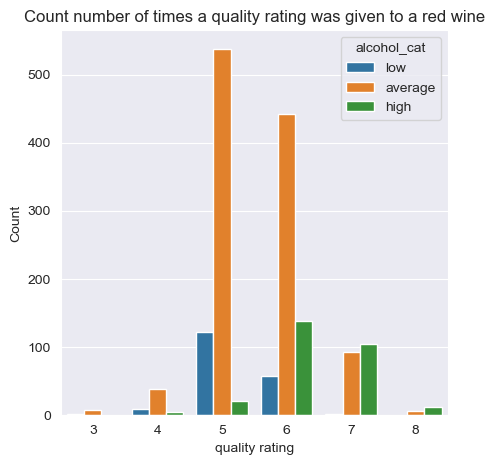

In [121]:
plt.figure(figsize = (5,5))
sns.countplot(x = "quality", data = red_dataset, hue="alcohol_cat")
plt.title("Count number of times a quality rating was given to a red wine")
plt.xlabel("quality rating")
plt.ylabel("Count")
plt.show()
plt.close()

The plot above was used for much the same reasons as the plot fot the white wine which is explained above.

## Quality Distribution comparison between red and white wine based on alcohol content:

Text(0.5, 1.0, 'Red Wine')

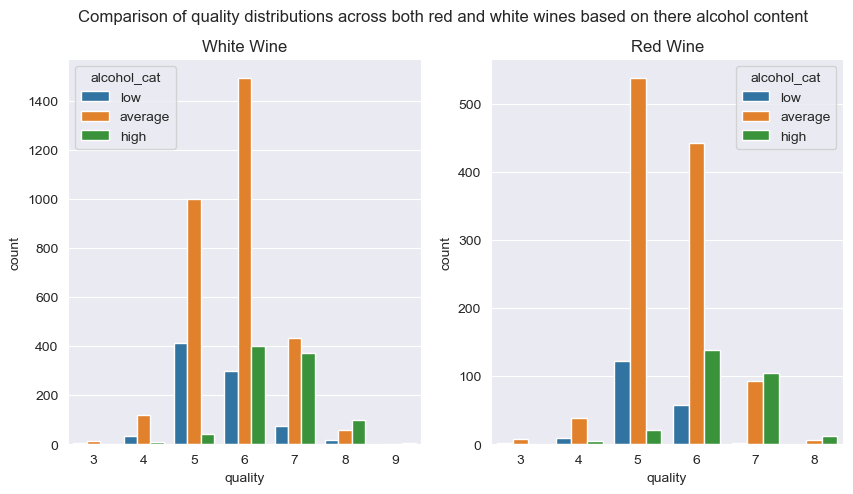

In [122]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="quality",data=white_dataset, ax=ax[0], hue="alcohol_cat")
sns.countplot(x="quality",data=red_dataset , ax=ax[1], hue="alcohol_cat")
fig.suptitle("Comparison of quality distributions across both red and white wines based on there alcohol content")
ax[0].set_title("White Wine")
ax[1].set_title("Red Wine")

The plot above shows the comparison between the effect that alcohol content has on the quality rating given to both red and white wine. Overall both graph exhibit very similar features showing there was not a huge variation in the content of alcohol in the wines sampled. An interesting observation from both graphs is that the lower alcohol content wines for both types of wine were given lower ratings on average shown by the decline of lower alcohol content as the higher rating are given. This could be for a number of reasons and there is not enough data to speculate on these but it does seem that at least a certain level of alcohol content is needed to create a higher quality wine.

## Categorising wine based on residual sugar white wine:

In [123]:
white_dataset["is_sweet"] = pd.cut(
    x=white_dataset["residual sugar"],
    bins=[0, white_dataset["residual sugar"].median(), white_dataset["residual sugar"].max()],
    labels=["dry","sweet"])
display(white_dataset.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,is_sweet
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low,sweet
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,average,dry
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,average,sweet
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average,sweet
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average,sweet


The above code divides the white wine samples into sweet and dry wines based on their residual sugar content this was done by taking the median residual sugar value as the splitting point. This point was chosen to balance the group to make it more useful for machine learning applications later.

## Categorising wine based on residual sugar red wine:

In [124]:
red_dataset["is_sweet"] = pd.cut(
    x=red_dataset["residual sugar"],
    bins=[0, red_dataset["residual sugar"].median(), red_dataset["residual sugar"].max()],
    labels=["dry","sweet"])
display(red_dataset.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,is_sweet
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average,dry
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average,sweet
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average,sweet
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average,dry
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average,dry


The above code divides the red wine samples into sweet and dry wines based on their residual sugar content it was done using the same method as with the white wine samples for the same reasons. This data set did not split with the same balance as the white wine set and is slightly skewed toward dry wines this will be taken into account for future machine learning applications.

Text(0.5, 1.0, 'Red Wine')

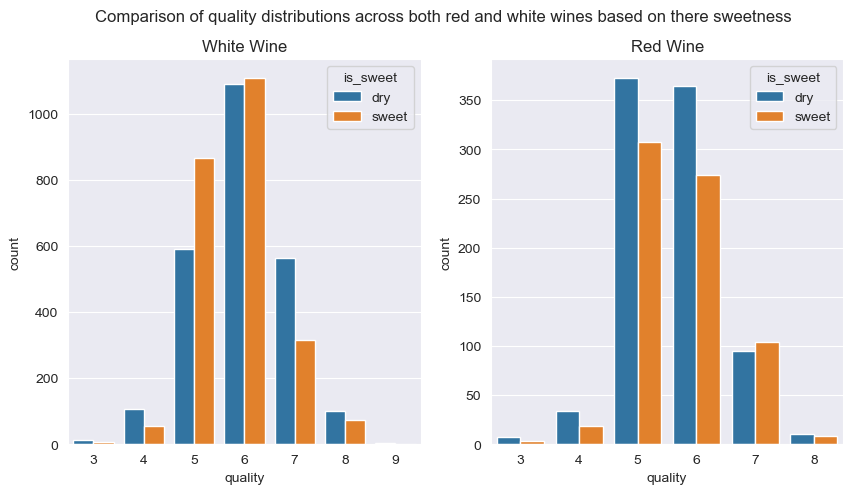

In [125]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="quality",data=white_dataset, ax=ax[0], hue="is_sweet")
sns.countplot(x="quality",data=red_dataset , ax=ax[1], hue="is_sweet")
fig.suptitle("Comparison of quality distributions across both red and white wines based on there sweetness")
ax[0].set_title("White Wine")
ax[1].set_title("Red Wine")

The above plot shows the effect sweetens has on quality ratings given to the wines sampled. Count graphs were used with a hue based on the sweet or dry categorization made above to clearly show the effect of sweetness on wine quality ratings. The sweetness based on the categorization factors chosen does not seem to have much of an effect on the quality rating given to the wines sampled. There is perhaps a slight skewing towards higher quality white wines being dry but this does not have a strong enough link to say anything conclusive.

# Task 2: Determining which subset of variables is the most useful for learning

In [126]:

white_dataset_prep = white_dataset
red_dataset_prep = red_dataset


cats = ["is_sweet", "alcohol_cat"]

for feature in cats:
    dummies = pd.get_dummies(white_dataset_prep[feature])
    white_dataset_prep = pd.concat((white_dataset_prep, dummies), axis = 1)
    white_dataset_prep = white_dataset_prep.drop(feature, axis = 1)

    dummies = pd.get_dummies(red_dataset_prep[feature])
    red_dataset_prep = pd.concat((red_dataset_prep, dummies), axis = 1)
    red_dataset_prep = red_dataset_prep.drop(feature, axis = 1)


The above code converts all the categorical data in the data sets into a numerical format to allow for machine learning applications.

## Determining the correlation of the data in the white wine data set

<AxesSubplot:>

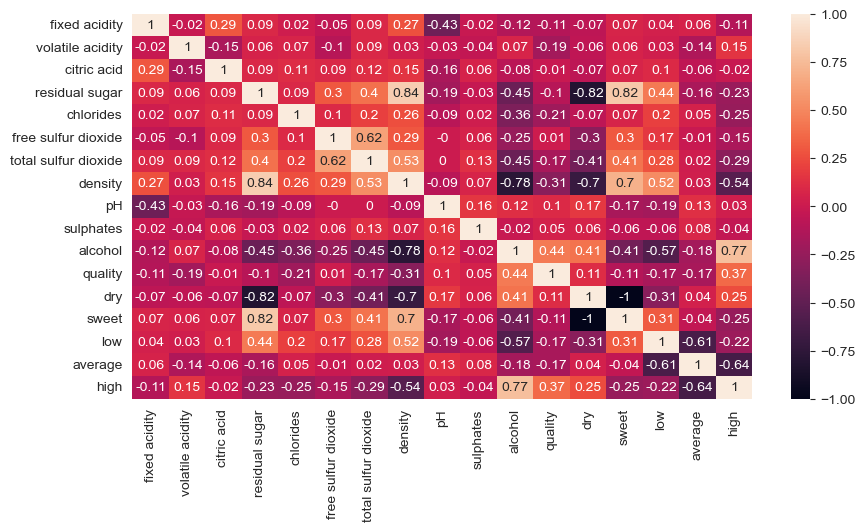

In [127]:
plt.figure(figsize = (10,5))
sns.heatmap(white_dataset_prep.corr(method="pearson").round(2), annot=True,vmin=-1, vmax=1)

The above plot shows a visual representation of the correlation matrix for the white wine data set. The Pearson's correlation coefficient was used as the data was normal most of the time, and it is all quantitative meaning that Pearson's appeared to be the best fit. A heat map was used to give a clear and easy to understand visualisation of the correlation matrix which was produced across the white wine data sample. The plot show that some values do have a reasonable correlation and some have almost no correlation some interesting examples of these are alcohol content appears to have quite a strong negative correlation with the density of the wine meaning as the alcohol content of the wine increases its density decreases this could be due to the fact that alcohol has a relatively low density and thus as it makes up a larger percentage of the wines it causes the density to decrease. There is then a strong positive correlation between the residual sugar and the density of the wine meaning as the residual sugar content increases the wines density increases this could be due to residual sugar having a high density in and of its self causing the density of the wine to increase in the wines which contain more of it. The free sulphur and total sulfur dioxides of the wine samples share a medium positive correlation which is not surprising as an increased number of free sulphur dioxide would suggest there should be more total sulfur dioxide on average. The total sulphur dioxide also has a medium positive correlation with the density again suggesting that sulphur dioxide could be one of higher density ingredients in the wine. When it comes to the wines quality rating the highest correlation seems to be with alcohol content which has a medium positive correlation showing that it may be possible that higher quality wines contain more alcohol. All of these are assumptions based on the data which has been collected and a more indepth quality scaling system may have helped to provide more context to this also more information on the reviewers may have allowed for more conclusive data analysis.

## Determining the correlation of the data in the red wine data set

<AxesSubplot:>

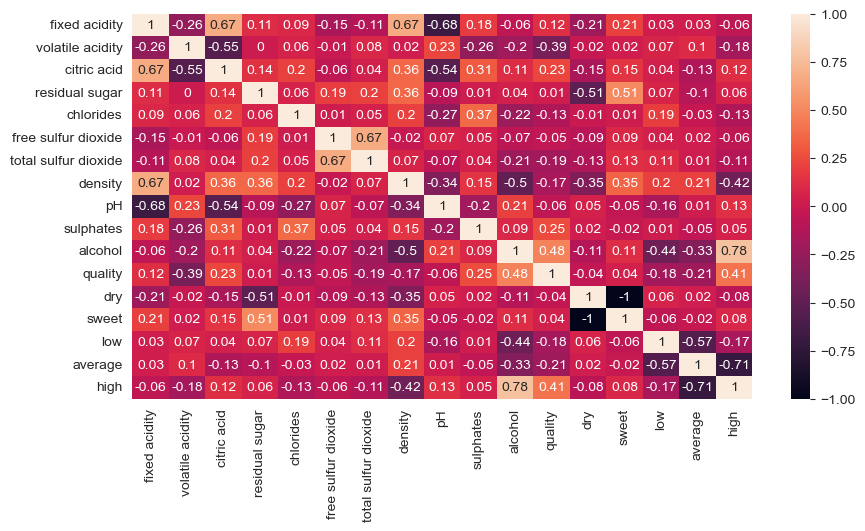

In [128]:
plt.figure(figsize = (10,5))
sns.heatmap(red_dataset_prep.corr(method="pearson").round(2), annot=True,vmin=-1, vmax=1)

The above plot shows a visual representation of correlation matrix created from the red wine data set using Pearson's correlation coefficient and a heat map to provide a visualisation of the data these options were chosen for the same reasons as explained in the white wine plot above. Some of the more interesting findings from this plot are fixed acidity and citric acid have a reasonably strong positive correlation while the volatile acidity as a medium strength negative correlation this could suggest that the fixed acidity comes from the citric acid contained in red wine and the volatile acidity is supplied by a different ingredient. The free sulfur and total sulphur dioxide values share a reasonable strong correlation as in the white wine which again could be for reasons specified in the white wine plot above. The density of the red wine samples has a reasonably strong positive correlation with the fixed acidity which could suggest the ingredients which give the wine it fixed acidity are also some of the more dense ingredients. The pH has a reasonably strong negative correlation with the fixed acidity and the citric acid content which makes sense as an increased amount of these ingredients would cause the wine to be more acidic brining the pH down. The quality rating of the wine does share a medium strength positive correlation with the alcohol content of the wine which could suggest that a higher alcohol content up to a point produces a higher quality red wine. The volatile acidity of the wine has a medium strength negative correlation with the quality rating the wine was given this could suggest that volatile acidity is not a desirable trait in red wine.

## Comparison of the red and white wine correlation matrices:

Text(0.5, 1.0, 'Red Wine')

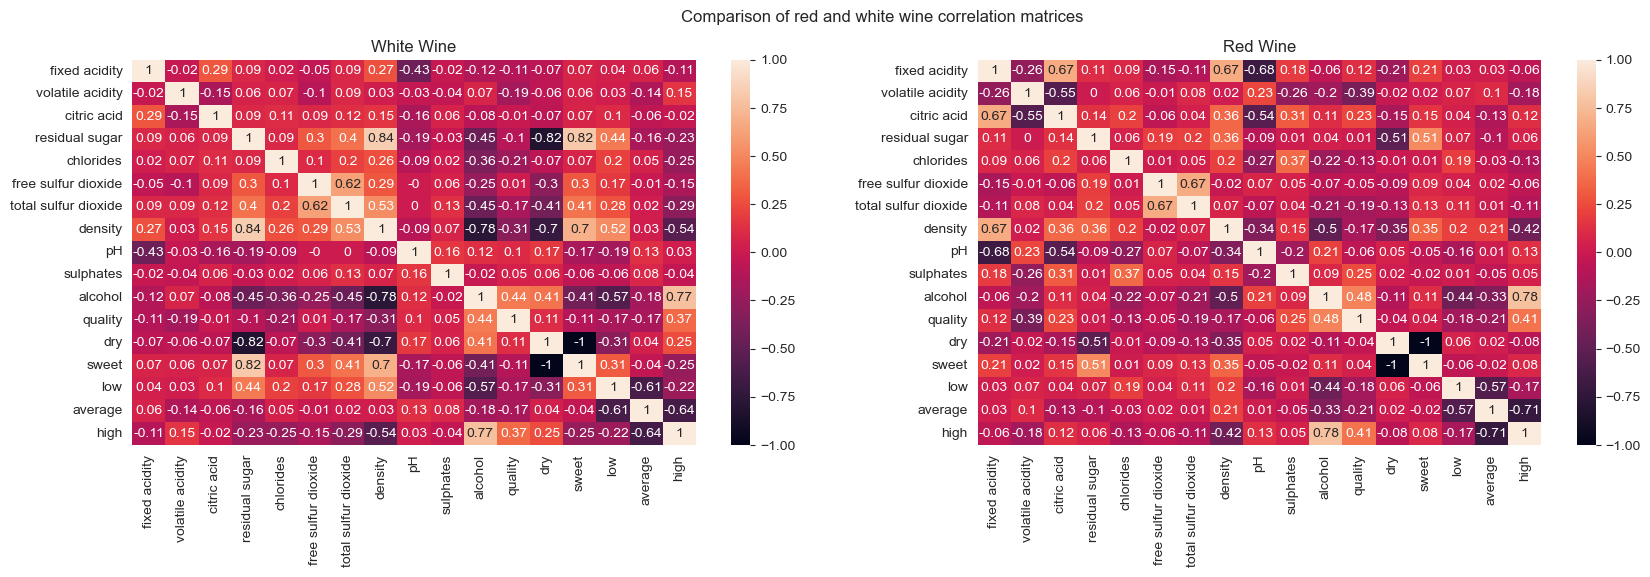

In [129]:
fig, ax =plt.subplots(1,2, figsize=(20,5))
sns.heatmap(white_dataset_prep.corr(method="pearson").round(2), annot=True,vmin=-1, vmax=1, ax=ax[0])
sns.heatmap(red_dataset_prep.corr(method="pearson").round(2), annot=True,vmin=-1, vmax=1, ax=ax[1])
fig.suptitle("Comparison of red and white wine correlation matrices")
ax[0].set_title("White Wine")
ax[1].set_title("Red Wine")

The above plot shows side by side the correlation matrices for the red and white wine data sets. These show that most of the correlations between the samples are shared but to varying degrees one example of this is that total sulphur dioxide content seems to have a much stronger correlation to the density of the wine in white wine than it does in red wine and the same goes for residual sugar content this could be due to a number of reasons.The reasons for this could be red wines on average having lower quantities of these ingredients causing them to have less of an impact on the overall density or other ingredients just having much larger impacts on the density further studies on the wines would be needed to make any real claims. An interesting observation is that in both plots alcohol content has a medium strength positive correlation to the quality rating given the wine which pose some interesting questions on whether a higher alcohol content causes a wine to be a higher quality or if higher quality wines simply contain more alcohol.
From these plots it is still difficult to determine which parameters would be useful for a successful machine learning model.
The chi2 function will also be used to provide further insight into the feature selection.

In [130]:
## preparing the data for machine learning models:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split


w_data = white_dataset_prep.drop(['quality'], axis = 1)
w_labels = white_dataset['quality']

w_data_train, data_test, w_labels_train, labels_test = train_test_split(w_data,
                                                                    w_labels,
                                                                    test_size = 0.01,
                                                                 random_state = 10)

white_wine_f_p = chi2(w_data_train, w_labels_train)
white_p=pd.Series(white_wine_f_p[1],index=w_data.columns)
white_p.sort_values(ascending=True,inplace=True)


r_data = red_dataset_prep.drop(['quality'], axis = 1)
r_labels = red_dataset['quality']

r_data_train, data_test, r_labels_train, labels_test = train_test_split(r_data,
                                                                    r_labels,
                                                                    test_size = 0.01,
                                                                    random_state = 10)

red_wine_f_p = chi2(r_data_train, r_labels_train)
red_p=pd.Series(red_wine_f_p[1],index=r_data.columns)
red_p.sort_values(ascending=True,inplace=True)

print("White wine features:\n", white_p.round(2))
print("Red wine features:\n", red_p.round(2))

White wine features:
 total sulfur dioxide    0.00
free sulfur dioxide     0.00
high                    0.00
residual sugar          0.00
low                     0.00
alcohol                 0.00
sweet                   0.00
dry                     0.00
average                 0.00
volatile acidity        0.05
fixed acidity           0.24
chlorides               0.88
citric acid             0.99
sulphates               1.00
pH                      1.00
density                 1.00
dtype: float64
Red wine features:
 total sulfur dioxide    0.00
high                    0.00
free sulfur dioxide     0.00
low                     0.00
alcohol                 0.00
average                 0.00
volatile acidity        0.01
citric acid             0.03
fixed acidity           0.06
sulphates               0.47
sweet                   0.51
residual sugar          0.54
dry                     0.63
chlorides               0.98
pH                      1.00
density                 1.00
dtype: float64


The above code applies the chi2 function to both datasets then using a maximum p-value of 0.05 which is common practice the following values will be excluded:
White Wine: fixed acidity, chlorides, citric acid, sulphates, pH and density
Red Wine: fixed acidity, sulphates, sweet, residual sugar, dry, chlorides, pH and density

## Removing non-useful features from the machine learning models:

In [131]:
white_dataset_prep =white_dataset_prep.drop(columns=["fixed acidity", "chlorides", "citric acid", "sulphates", "pH", "density"])
red_dataset_prep = red_dataset_prep.drop(columns=["fixed acidity", "sulphates", "sweet", "residual sugar", "dry", "chlorides", "pH", "density"])


# Task 3: machine learning approaches:

## Classification model white wine:

In [132]:

white_dataset_num_quality_0 = pd.cut(
    x=white_dataset["quality"],
    bins=[0, 5, 10],
    labels=[0,1])
white_dataset_onehot_0 = white_dataset_prep.drop(columns="quality")
white_dataset_onehot_0 = pd.concat((white_dataset_onehot_0, white_dataset_num_quality_0), axis=1)

white_dataset_num_quality_1 = pd.cut(
    x=white_dataset["quality"],
    bins=[0, 6, 10],
    labels=[0,1])

white_dataset_onehot_1 = white_dataset_prep.drop(columns="quality")
white_dataset_onehot_1 = pd.concat((white_dataset_onehot_1, white_dataset_num_quality_1), axis=1)

white_dataset_num_quality_2 = pd.cut(
    x=white_dataset["quality"],
    bins=[0, 7, 10],
    labels=[0,1])

white_dataset_onehot_2 = white_dataset_prep.drop(columns="quality")
white_dataset_onehot_2 = pd.concat((white_dataset_onehot_2, white_dataset_num_quality_2), axis=1)




The above code converts the quality ratings from a 1-10 scale to a binary high or low quality rating where 1 is high quality and 0 is low quality wine. The parameters for this split have been split into three versions where the splitting point from low to high quality increases from 5 to 6 and finally 7 this is to allow for the observation this will have on the training of the machine learning model. The datasets are labeled numericaly where set0's splitting point is the lowest and set2's splitting point is the highest.

## splitting the white wine data:

In [133]:


labels_0 = white_dataset_onehot_0['quality'].values
data_0 = white_dataset_onehot_0.drop(['quality'], axis = 1).values

data_train_0, data_test_0, labels_train_0, labels_test_0 = train_test_split(data_0,
                                                                            labels_0,
                                                                            test_size = 0.33,
                                                                            random_state = 10)

labels_1 = white_dataset_onehot_1['quality'].values
data_1 = white_dataset_onehot_1.drop(['quality'], axis = 1).values

data_train_1, data_test_1, labels_train_1, labels_test_1 = train_test_split(data_1,
                                                                            labels_1,
                                                                            test_size = 0.33,
                                                                            random_state = 10)

labels_2 = white_dataset_onehot_2['quality'].values
data_2 = white_dataset_onehot_2.drop(['quality'], axis = 1).values

data_train_2, data_test_2, labels_train_2, labels_test_2 = train_test_split(data_2,
                                                                            labels_2,
                                                                            test_size = 0.33,
                                                                            random_state = 10)


The above code splits the 3 datasets into testing and training data with a split of 33% of the data being used as test data leaving 67% as training data.

## Addressing the oversampling in the datasets:

In [134]:
from imblearn.over_sampling import SMOTE

data_train_0, labels_train_0 = SMOTE(random_state=10).fit_resample(data_train_0, labels_train_0)
data_train_1, labels_train_1 = SMOTE(random_state=10).fit_resample(data_train_1, labels_train_1)
data_train_2, labels_train_2 = SMOTE(random_state=10).fit_resample(data_train_2, labels_train_2)



The above code cell balances the datasets as high to low quality wine ratings become quite unbalanced especially as the split point from low to high quality wine increases. The SMOTE function was used to balance the datasets to improve the application of the machine learning algorithm.

## scaling the data:

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_train_scaled_0 = scaler.fit_transform(data_train_0)
data_test_scaled_0 = scaler.transform(data_test_0)

data_train_scaled_1 = scaler.fit_transform(data_train_1)
data_test_scaled_1 = scaler.transform(data_test_1)

data_train_scaled_2 = scaler.fit_transform(data_train_2)
data_test_scaled_2 = scaler.transform(data_test_2)

The above code cell scales the datasets using the standard scaler from sklearn this is again to improve the datas usefulness for machine learning.

## Random tree classifier:

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_0 = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=10)
random_forest_0.fit(data_train_scaled_0, labels_train_0)

random_forest_predictions_0 = random_forest_0.predict(data_train_scaled_0)
train_acc_0 = accuracy_score(labels_train_0, random_forest_predictions_0)

random_forest_predictions_0 = random_forest_0.predict(data_test_scaled_0)
test_acc_0 = accuracy_score(labels_test_0, random_forest_predictions_0)

print(f"Train_0 acc: {train_acc_0 * 100}%")
print(f"Test_0 acc: {test_acc_0 * 100}%")

random_forest_1 = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=10)
random_forest_1.fit(data_train_scaled_1, labels_train_1)

random_forest_predictions_1 = random_forest_1.predict(data_train_scaled_1)
train_acc_1 = accuracy_score(labels_train_1, random_forest_predictions_1)

random_forest_predictions_1 = random_forest_1.predict(data_test_scaled_1)
test_acc_1 = accuracy_score(labels_test_1, random_forest_predictions_1)

print(f"Train_1 acc: {train_acc_1 * 100}%")
print(f"Test_1 acc: {test_acc_1 * 100}%")

random_forest_2 = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=10)
random_forest_2.fit(data_train_scaled_2, labels_train_2)

random_forest_predictions_2 = random_forest_2.predict(data_train_scaled_2)
train_acc_2 = accuracy_score(labels_train_2, random_forest_predictions_2)

random_forest_predictions_2 = random_forest_2.predict(data_test_scaled_2)
test_acc_2 = accuracy_score(labels_test_2, random_forest_predictions_2)

print(f"Train_2 acc: {train_acc_2 * 100}%")
print(f"Test_2 acc: {test_acc_2 * 100}%")


Train_0 acc: 100.0%
Test_0 acc: 82.1273964131107%
Train_1 acc: 99.96116504854369%
Test_1 acc: 84.53927025355597%
Train_2 acc: 100.0%
Test_2 acc: 96.28942486085343%


The above code cell train and then tests the application of a random tree classifier for the purpose of predicting the quality ratings given to the wine samples given measures given for each sample. A random tree classifier was used because this is an ideal learning model for classification, and it has a significantly lower chance of overfitting than the normal tree model. The train and test accuracy which were produced for each dataset still seem to suggest overfitting as the test accuracy's are all extremely close to 100% to try and further reduce this hyperparameter tuning must take place.

## Hyperparameter tuning:

In [137]:
from sklearn.model_selection import GridSearchCV

random_state = 10
number_of_folds = 5

parameters_to_tune = [{'n_estimators': [10, 500],
                       'max_depth': [5, 500]}]

search = GridSearchCV(RandomForestClassifier(random_state = random_state), parameters_to_tune, cv = number_of_folds)
search.fit(data_train_scaled_0, labels_train_0)

print(f"Best parameters set found: {search.best_params_}")

random_forest = RandomForestClassifier(n_estimators=search.best_params_['n_estimators'],
                                       max_depth=search.best_params_['max_depth'],
                                       random_state=10)
random_forest.fit(data_train_scaled_0, labels_train_0)

random_forest_predictions = random_forest.predict(data_train_scaled_0)
train_acc = accuracy_score(labels_train_0, random_forest_predictions)

random_forest_predictions = random_forest.predict(data_test_scaled_0)
test_acc = accuracy_score(labels_test_0, random_forest_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")


Best parameters set found: {'max_depth': 500, 'n_estimators': 500}
Train acc: 100.0%
Test acc: 83.17872603586889%


The code cell above uses a 5-fold cross validation grid search to find the best parameters and surprisingly supports the use of the parameters which were used this may suggest that there is not over fitting and in fact this learning algorithm has produced a relatively accurate wine quality predictor when the wine quality is categorised as a binary high or low quality value.

## classification report for white wine:

In [138]:
from sklearn.metrics import classification_report
print("Classification report for data white wine dataset 0")
print(classification_report(labels_test_0, random_forest_predictions_0))

print("Classification report for data white wine dataset 1")
print(classification_report(labels_test_1, random_forest_predictions_1))


print("Classification report for data white wine dataset 2")
print(classification_report(labels_test_2, random_forest_predictions_2))


Classification report for data white wine dataset 0
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       537
           1       0.88      0.85      0.86      1080

    accuracy                           0.82      1617
   macro avg       0.80      0.81      0.80      1617
weighted avg       0.83      0.82      0.82      1617

Classification report for data white wine dataset 1
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1263
           1       0.65      0.64      0.64       354

    accuracy                           0.85      1617
   macro avg       0.77      0.77      0.77      1617
weighted avg       0.84      0.85      0.84      1617

Classification report for data white wine dataset 2
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1545
           1       0.62      0.43      0.51        72

    accuracy              

The classification report shows that there is a reasonable amount of precision and recall is good leading to a reasonable strong f1 score. The support does show that the results were quite imbalanced and they got more imbalanced as the alcohol quality splitting point was increased. The imbalance of the data could go some way to explaing the issues with over fitting which occurred but this would have to be investigated further.

## Classification model red wine:

In [139]:
red_dataset_num_quality_0 = pd.cut(
    x=red_dataset["quality"],
    bins=[0, 5, 10],
    labels=[0,1])
red_dataset_onehot_0 = red_dataset_prep.drop(columns="quality")
red_dataset_onehot_0 = pd.concat((red_dataset_onehot_0, red_dataset_num_quality_0), axis=1)

red_dataset_num_quality_1 = pd.cut(
    x=red_dataset["quality"],
    bins=[0, 6, 10],
    labels=[0,1])

red_dataset_onehot_1 = red_dataset_prep.drop(columns="quality")
red_dataset_onehot_1 = pd.concat((red_dataset_onehot_1, red_dataset_num_quality_1), axis=1)

red_dataset_num_quality_2 = pd.cut(
    x=red_dataset["quality"],
    bins=[0, 7, 10],
    labels=[0,1])

red_dataset_onehot_2 = red_dataset_prep.drop(columns="quality")
red_dataset_onehot_2 = pd.concat((red_dataset_onehot_2, red_dataset_num_quality_2), axis=1)




## Splitting Red wine data:

In [140]:
labels_0 = red_dataset_onehot_0['quality'].values
data_0 = red_dataset_onehot_0.drop(['quality'], axis = 1).values

data_train_0, data_test_0, labels_train_0, labels_test_0 = train_test_split(data_0,
                                                                            labels_0,
                                                                            test_size = 0.33,
                                                                            random_state = 10)

labels_1 = red_dataset_onehot_1['quality'].values
data_1 = red_dataset_onehot_1.drop(['quality'], axis = 1).values

data_train_1, data_test_1, labels_train_1, labels_test_1 = train_test_split(data_1,
                                                                            labels_1,
                                                                            test_size = 0.33,
                                                                            random_state = 10)

labels_2 = red_dataset_onehot_2['quality'].values
data_2 = red_dataset_onehot_2.drop(['quality'], axis = 1).values

data_train_2, data_test_2, labels_train_2, labels_test_2 = train_test_split(data_2,
                                                                            labels_2,
                                                                            test_size = 0.33,
                                                                            random_state = 10)

## Addressing the oversampling in the datasets:

In [141]:
data_train_0, labels_train_0 = SMOTE(random_state=10).fit_resample(data_train_0, labels_train_0)
data_train_1, labels_train_1 = SMOTE(random_state=10).fit_resample(data_train_1, labels_train_1)
data_train_2, labels_train_2 = SMOTE(random_state=10).fit_resample(data_train_2, labels_train_2)


## scaling the data:

In [142]:
data_train_scaled_0 = scaler.fit_transform(data_train_0)
data_test_scaled_0 = scaler.transform(data_test_0)

data_train_scaled_1 = scaler.fit_transform(data_train_1)
data_test_scaled_1 = scaler.transform(data_test_1)

data_train_scaled_2 = scaler.fit_transform(data_train_2)
data_test_scaled_2 = scaler.transform(data_test_2)

## Random tree classifier:

In [143]:
random_forest_0 = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=10)
random_forest_0.fit(data_train_scaled_0, labels_train_0)

random_forest_predictions_0 = random_forest_0.predict(data_train_scaled_0)
train_acc_0 = accuracy_score(labels_train_0, random_forest_predictions_0)

random_forest_predictions_0 = random_forest_0.predict(data_test_scaled_0)
test_acc_0 = accuracy_score(labels_test_0, random_forest_predictions_0)

print(f"Train_0 acc: {train_acc_0 * 100}%")
print(f"Test_0 acc: {test_acc_0 * 100}%")

random_forest_1 = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=10)
random_forest_1.fit(data_train_scaled_1, labels_train_1)

random_forest_predictions_1 = random_forest_1.predict(data_train_scaled_1)
train_acc_1 = accuracy_score(labels_train_1, random_forest_predictions_1)

random_forest_predictions_1 = random_forest_1.predict(data_test_scaled_1)
test_acc_1 = accuracy_score(labels_test_1, random_forest_predictions_1)

print(f"Train_1 acc: {train_acc_1 * 100}%")
print(f"Test_1 acc: {test_acc_1 * 100}%")

random_forest_2 = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=10)
random_forest_2.fit(data_train_scaled_2, labels_train_2)

random_forest_predictions_2 = random_forest_2.predict(data_train_scaled_2)
train_acc_2 = accuracy_score(labels_train_2, random_forest_predictions_2)

random_forest_predictions_2 = random_forest_2.predict(data_test_scaled_2)
test_acc_2 = accuracy_score(labels_test_2, random_forest_predictions_2)

print(f"Train_2 acc: {train_acc_2 * 100}%")
print(f"Test_2 acc: {test_acc_2 * 100}%")


Train_0 acc: 100.0%
Test_0 acc: 75.9469696969697%
Train_1 acc: 100.0%
Test_1 acc: 84.0909090909091%
Train_2 acc: 100.0%
Test_2 acc: 98.29545454545455%


## Hyperparameter tuning:

In [144]:
random_state = 10
number_of_folds = 5

parameters_to_tune = [{'n_estimators': [10, 500],
                       'max_depth': [5, 500]}]

search = GridSearchCV(RandomForestClassifier(random_state = random_state), parameters_to_tune, cv = number_of_folds)
search.fit(data_train_scaled_0, labels_train_0)

print(f"Best parameters set found: {search.best_params_}")

random_forest = RandomForestClassifier(n_estimators=search.best_params_['n_estimators'],
                                       max_depth=search.best_params_['max_depth'],
                                       random_state=10)
random_forest.fit(data_train_scaled_0, labels_train_0)

random_forest_predictions = random_forest.predict(data_train_scaled_0)
train_acc = accuracy_score(labels_train_0, random_forest_predictions)

random_forest_predictions = random_forest.predict(data_test_scaled_0)
test_acc = accuracy_score(labels_test_0, random_forest_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")


Best parameters set found: {'max_depth': 500, 'n_estimators': 500}
Train acc: 100.0%
Test acc: 78.03030303030303%


The code above tunes the hyperparameters and tries to prevent over fitting which is apparent in the results given but even with the hyperperameter tuning there is still over fitting this could possibly be further investigated with a further ranging search for parameters but due to time and resource constraints the over fitting is not preventable instead a basic tree model will be applied to one set of the data to identify if the overfitting could have in fact been caused due to the model being used being too complex for the data.

In [145]:
from sklearn import tree

random_state = 10

decision_tree = tree.DecisionTreeClassifier(random_state=random_state).fit(data_train_scaled_0, labels_train_0)

decision_tree_predictions = decision_tree.predict(data_train_scaled_0)
train_acc = accuracy_score(labels_train_0, decision_tree_predictions)

decision_tree_predictions = decision_tree.predict(data_test_scaled_0)
test_acc = accuracy_score(labels_test_0, decision_tree_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 100.0%
Test acc: 73.67424242424242%


The basic decision tree model still overfits when applied to this categorising problem further investigation would be needed to investigate if there would be a way to prevent overfiting in on this dataset.

## Classification Report for red wine:

In [146]:
print("Classification report for data red wine dataset 0")
print(classification_report(labels_test_0, random_forest_predictions_0))

print("Classification report for data red wine dataset 1")
print(classification_report(labels_test_1, random_forest_predictions_1))


print("Classification report for data red wine dataset 2")
print(classification_report(labels_test_2, random_forest_predictions_2))

Classification report for data red wine dataset 0
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       253
           1       0.78      0.75      0.77       275

    accuracy                           0.76       528
   macro avg       0.76      0.76      0.76       528
weighted avg       0.76      0.76      0.76       528

Classification report for data red wine dataset 1
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       455
           1       0.45      0.66      0.53        73

    accuracy                           0.84       528
   macro avg       0.69      0.76      0.72       528
weighted avg       0.87      0.84      0.85       528

Classification report for data red wine dataset 2
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       517
           1       1.00      0.18      0.31        11

    accuracy                    

## Conclusion on the Classification problem approach:
Approaching the prediction of wine quality as a categorisation problem had its challenges these included the over fitting problems which occurred as well as the imbalances in the data. The issues that occurred were consistent across both datasets and further investigation would be needed to identify the exact reasons behind these hyper parameter tuning was used in an attempt to reduce the prevalent overfitting but this seemed to be relatively ineffective. A basic decision tree model was also used as a test case to examine if it was a data complexity issue but this still seemed to run into overfitting in this application. It would be interesting to further investigate this but due to time and resource constraints only a relatively small amount of parameter searching could take place and as such it is still possible with the correct parameters overfitting could have been reduced but this is yet to be proven.

# Regression problem white wine:

## Preparing the data:

In [147]:
from imblearn.over_sampling import RandomOverSampler

data = white_dataset_prep.drop(['quality'], axis = 1).values
labels = white_dataset_prep['quality'].values

data_train, data_test, labels_train, labels_test = train_test_split(data,
                                                                    labels,
                                                                    test_size = 0.33,
                                                                    random_state = 10)
data_train, labels_train = RandomOverSampler(random_state=10).fit_resample(data_train, labels_train)

data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)



The data is split where 33 percent of it is used as test data this is a reasonable split so the model has enough training data to train but there is enough test data so that the model still has a varied data sample to be tested on. The data is balanced using the random over sampler as the SMOTE over sampler would not work for this purpose due to there being some quality ratings with very few occurrences.

In [148]:
from sklearn.svm import SVC

C = 100
kernel = 'linear'
random_state = 10
degree = 10
coef0 = 9

linear_svm = SVC(kernel=kernel, random_state=random_state, degree=degree, coef0=coef0)

linear_svm.fit(data_train_scaled, labels_train)

linear_svm_predictions = linear_svm.predict(data_test_scaled)

test_acc = accuracy_score(labels_test, linear_svm_predictions)

linear_svm_predictions = linear_svm.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, linear_svm_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 44.91459627329192%
Test acc: 30.550401978973408%


The above code uses the SVC model to learn to predict the quality of the wine where the wine quality rating is now a continuous regression probem ideally the kernel would be able to be adjusted but for practicality of running time a liner kernel was used.

In [149]:
number_of_folds = 5
random_state = 10

parameters_to_tune = [{
                       'C': [1, 10],
                       'degree': [1, 40],
                       'coef0': [1, 9]}]

search = GridSearchCV(SVC(random_state = random_state), parameters_to_tune, cv = number_of_folds)
search.fit(data_train_scaled, labels_train)

print(f"Best parameters set found: {search.best_params_}")

Best parameters set found: {'C': 10, 'coef0': 1, 'degree': 1}


In [150]:
from sklearn.metrics import mean_squared_error

C = 10
kernel = 'linear'
random_state = 10
degree = 1
coef0 = 1

linear_svm = SVC(kernel=kernel, random_state=random_state, degree=degree, coef0=coef0)

linear_svm.fit(data_train_scaled, labels_train)

linear_svm_predictions = linear_svm.predict(data_test_scaled)

test_acc = accuracy_score(labels_test, linear_svm_predictions)

linear_svm_predictions = linear_svm.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, linear_svm_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

print(f"Mean Square Error:", mean_squared_error(labels_train,linear_svm_predictions))

Train acc: 44.91459627329192%
Test acc: 30.550401978973408%
Mean Square Error: 2.440702639751553


## Regression problem red wine:

In [151]:
from imblearn.over_sampling import RandomOverSampler

data = red_dataset_prep.drop(['quality'], axis = 1).values
labels = red_dataset_prep['quality'].values

data_train, data_test, labels_train, labels_test = train_test_split(data,
                                                                    labels,
                                                                    test_size = 0.33,
                                                                    random_state = 10)
data_train, labels_train = RandomOverSampler(random_state=10).fit_resample(data_train, labels_train)

data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)


In [154]:

C = 100
kernel = 'linear'
random_state = 10
degree = 10
coef0 = 9

linear_svm = SVC(kernel=kernel, random_state=random_state, degree=degree, coef0=coef0)

linear_svm.fit(data_train_scaled, labels_train)

linear_svm_predictions = linear_svm.predict(data_test_scaled)

test_acc = accuracy_score(labels_test, linear_svm_predictions)

linear_svm_predictions = linear_svm.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, linear_svm_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 61.24721603563474%
Test acc: 39.015151515151516%


In [155]:
number_of_folds = 5
random_state = 10

parameters_to_tune = [{
    'C': [1, 10],
    'degree': [1, 40],
    'coef0': [1, 9]}]

search = GridSearchCV(SVC(random_state = random_state), parameters_to_tune, cv = number_of_folds)
search.fit(data_train_scaled, labels_train)

print(f"Best parameters set found: {search.best_params_}")

Best parameters set found: {'C': 10, 'coef0': 1, 'degree': 1}


In [157]:


C = 10
kernel = 'linear'
random_state = 10
degree = 1
coef0 = 1

linear_svm = SVC(kernel=kernel, random_state=random_state, degree=degree, coef0=coef0)

linear_svm.fit(data_train_scaled, labels_train)

linear_svm_predictions = linear_svm.predict(data_test_scaled)

test_acc = accuracy_score(labels_test, linear_svm_predictions)

linear_svm_predictions = linear_svm.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, linear_svm_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

print(f"Mean Square Error:", mean_squared_error(labels_train,linear_svm_predictions))

Train acc: 61.24721603563474%
Test acc: 39.015151515151516%
Mean Square Error: 1.1796585003711952
